#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

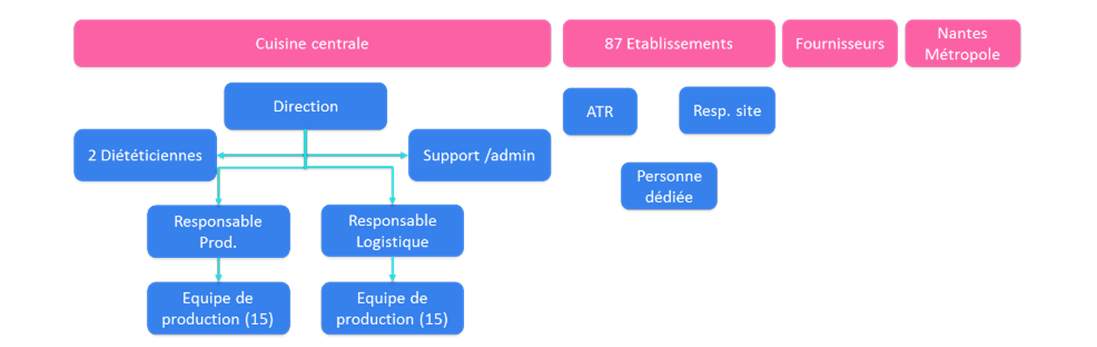

### 4 - Processus actuel

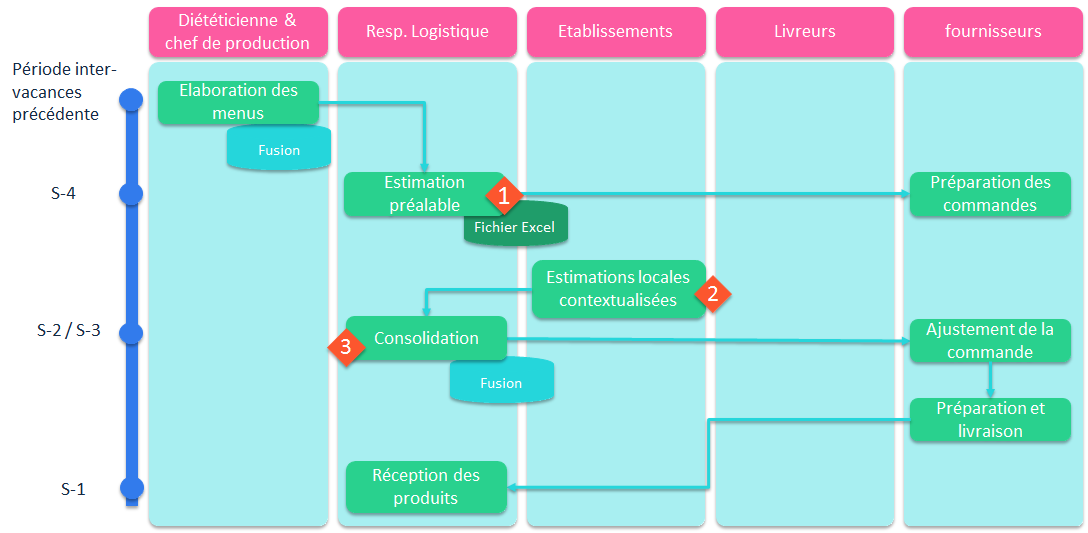

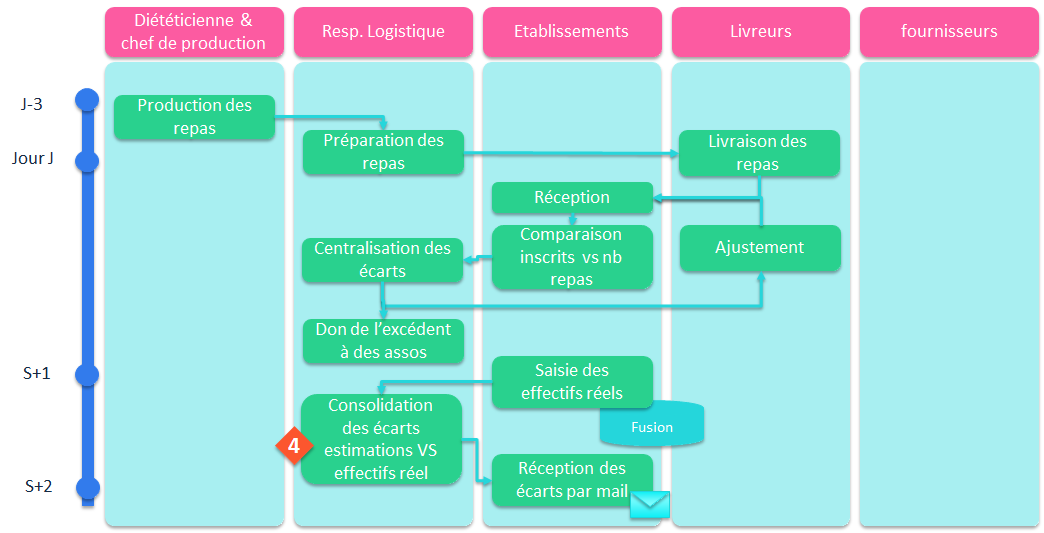

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


# Exploration et Nettoyage des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Chargement des données

In [2]:
# Ouverture du fichier frequentation

frequentation = pd.read_csv("./Dataset/frequentation.csv")

In [3]:
# Ouverture du fichier menus

menu = pd.read_csv("./Dataset/menus.csv")

### Fréquentation

In [4]:
# Information sur la DataFrame frequentation

frequentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1188 non-null   int64 
 1   date             1188 non-null   object
 2   annee_scolaire   1188 non-null   object
 3   jour             1188 non-null   object
 4   semaine          1188 non-null   int64 
 5   mois             1188 non-null   object
 6   greves           1188 non-null   int64 
 7   ferie            1188 non-null   int64 
 8   veille_ferie     1188 non-null   int64 
 9   retour_ferie     1188 non-null   int64 
 10  vacances         1188 non-null   int64 
 11  retour_vacances  1188 non-null   int64 
 12  veille_vacances  1188 non-null   int64 
 13  fete_musulmane   1188 non-null   int64 
 14  ramadan          1188 non-null   int64 
 15  fete_chretienne  1188 non-null   int64 
 16  fete_juive       1188 non-null   int64 
 17  inc_grippe       1188 non-null   

In [5]:
# Présentation des premières lignes 

frequentation.head()

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,0,0,0,0,7200,6453,493,12309,11302,17373


In [6]:
# identifier et supprimer les colonnes inutiles

frequentation = frequentation.drop('Unnamed: 0', axis=1)

In [7]:
# une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global.

frequentation["%Freq"] = frequentation["reel"] / frequentation["effectif"] * 100 

In [8]:
frequentation[["%Freq","reel","effectif"]]

,%Freq,reel,effectif
0,64.059172,11129,17373
1,67.967536,11808,17373
2,67.581880,11741,17373
3,70.926150,12322,17373
4,65.054970,11302,17373
...,...,...,...
1183,52.685521,10898,20685
1184,31.143341,6442,20685
1185,44.321972,9168,20685
1186,59.806623,12371,20685


In [9]:
# Stats du dataframe frequentation

frequentation.describe(include = 'all')

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq
count,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,...,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,141,300,NaN,146,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,0.027778,...,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226,67.852347
std,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,0.164405,...,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762,12.481810
min,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000,68.435838
50%,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000,70.311207
75%,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000,72.279556


In [10]:
# Verification valeurs manquantes

frequentation.isna().sum()

date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
greves             0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
%Freq              0
dtype: int64

In [11]:
# Verification des doublons

frequentation.duplicated().sum()

0

Le fichier frequentation n'a pas de valeurs nulles ni de doublons.

In [12]:
avg_freq = round(frequentation["%Freq"].mean(),2)

print("la frequentation moyenne est : {} %".format(avg_freq))

la frequentation moyenne est : 67.85 %


In [13]:
# calculer la frequentation moyenne par année scolaire

frequentation.groupby("annee_scolaire")["%Freq"].mean()

annee_scolaire
2010-2011    63.401084
2011-2012    66.281200
2012-2013    68.039686
2013-2014    60.802025
2014-2015    70.503691
2015-2016    71.266758
2016-2017    70.660187
2017-2018    69.767581
2018-2019    68.944611
2019-2020    70.169254
Name: %Freq, dtype: float64

### Histogramme de la fréquentation

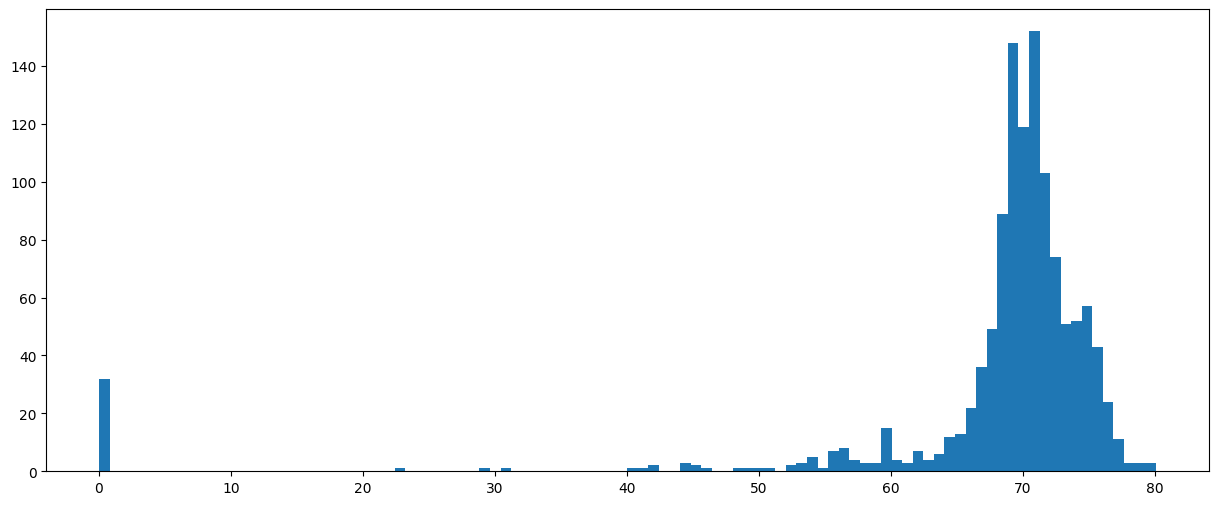

In [14]:
plt.figure(figsize=(15,6))

plt.hist(frequentation["%Freq"], bins=100)

plt.show()

In [15]:
# Supprimer la frequentation moins de 60%

ind = frequentation[frequentation["%Freq"]<60].index

In [16]:
frequentation.drop(ind, inplace= True)

In [17]:
frequentation[frequentation["%Freq"]<60]

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq


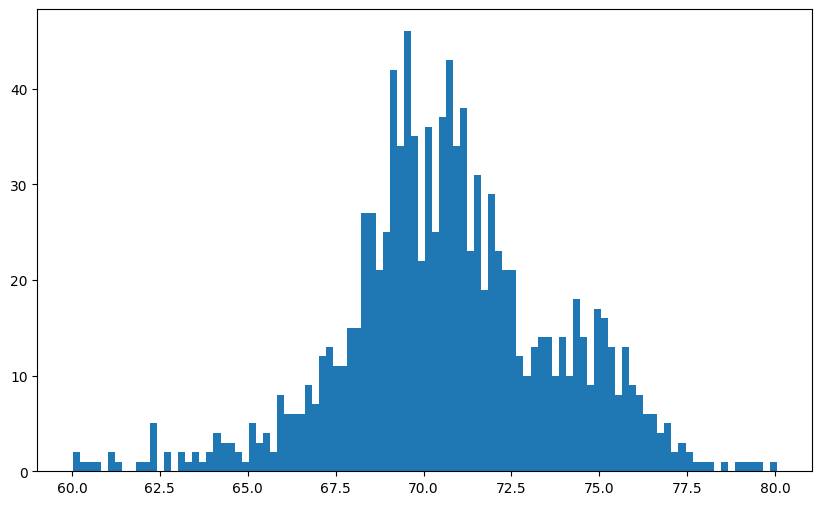

In [18]:
# Histogramme de la fréquentation aprés la suppression des lignes inutiles

plt.figure(figsize=(10,6))

plt.hist(frequentation["%Freq"], bins=100)

plt.show()

### Menu

In [19]:
# Information sur la DataFrame menu

menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1188 non-null   int64 
 1   date        1188 non-null   object
 2   menu        1188 non-null   object
 3   porc        1188 non-null   int64 
 4   viande      1188 non-null   int64 
 5   poisson     1188 non-null   int64 
 6   bio         1188 non-null   int64 
 7   noel        1188 non-null   int64 
 8   frites      1188 non-null   int64 
 9   an_chinois  1188 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 92.9+ KB


In [20]:
# Présentation des premières lignes 

menu.head()

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0


In [21]:
# Verification valeurs manquantes

menu.isna().sum()

Unnamed: 0    0
date          0
menu          0
porc          0
viande        0
poisson       0
bio           0
noel          0
frites        0
an_chinois    0
dtype: int64

In [22]:
# Verification des doublons

menu.duplicated().sum()

0

In [23]:
# identifier et supprimer les colonnes inutiles

menu = menu.drop('Unnamed: 0', axis=1)

In [24]:
# Stats du dataframe frequentation

menu.describe(include="all")

,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
count,1188,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,1188,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367
std,NaN,NaN,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000


### Diagramme circulaire

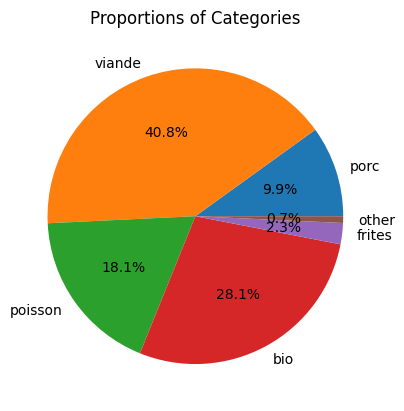

,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1183,2019-12-09,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,2019-12-10,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,2019-12-13,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,2019-12-16,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [25]:
# Diagramme circulaire pour représenter les colonnes de menu

menu['other'] = menu[['noel', 'an_chinois']].sum(axis=1)

proportions = menu[['porc', 'viande', 'poisson', 'bio', 'frites','other']].sum()

plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')

plt.title('Proportions of Categories')

plt.show()

menu.drop(['other'], axis=1)

## Jointure des dataframes

In [26]:
df_final = pd.merge(frequentation,menu, on='date', how= 'outer', indicator=True)

df_final

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,other,_merge
0,2011-01-03,2010-2011,Lundi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,0,both
1,2011-01-04,2010-2011,Mardi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,0,both
2,2011-01-06,2010-2011,Jeudi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,0,both
3,2011-01-07,2010-2011,Vendredi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,0,both
4,2011-01-10,2010-2011,Lundi,2.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2019-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,0,right_only
1184,2019-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,0,right_only
1185,2019-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,0,right_only
1186,2019-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,0,right_only


### Analyse le taux de fréquentation

<Axes: title={'center': 'Freq par mois'}, xlabel='mois', ylabel='Freq'>

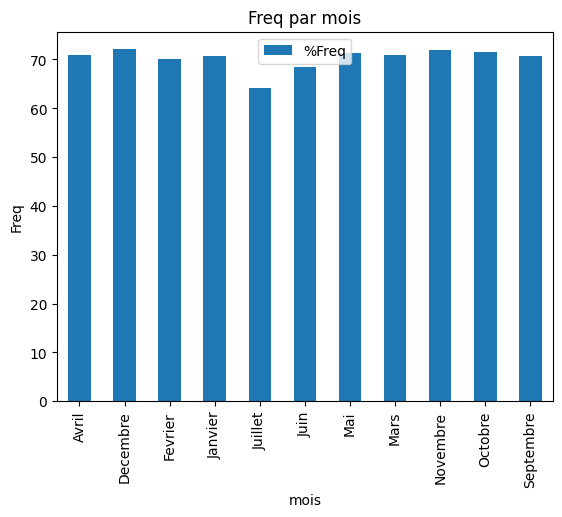

In [27]:
# Diagramme à barres représentant la fréquentation moyenne par mois

df_final[["mois", "%Freq"]].groupby("mois").mean().plot(kind = "bar", title="Freq par mois",ylabel="Freq")

In [28]:
#enlever les vacances

masq_july = df_final[df_final['mois'] == 'Juillet'].index
df_final.drop(masq_july, inplace = True)

masq_vacance = df_final[df_final['vacances']==1].index
df_final.drop(masq_vacance, inplace = True)

In [29]:
df_final=df_final.drop('vacances', axis=1)
df_final=df_final.drop('retour_vacances', axis=1)
df_final=df_final.drop('veille_vacances', axis=1)

<Axes: title={'center': 'Freq par jour'}, xlabel='jour', ylabel='Freq'>

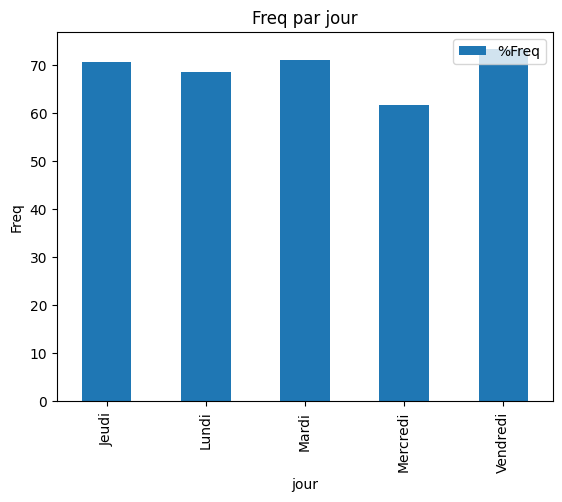

In [30]:
# Diagramme à barres représentant la fréquentation moyenne par jour

df_final[["jour", "%Freq"]].groupby("jour").mean().plot(kind = "bar", title="Freq par jour",ylabel="Freq")

In [31]:
#enlever les mercredis

masq_wednesday = df_final[df_final['jour'] == 'Mercredi'].index
df_final.drop(masq_wednesday, inplace = True)

<Axes: title={'center': 'Freq par greve'}, xlabel='greves', ylabel='Freq'>

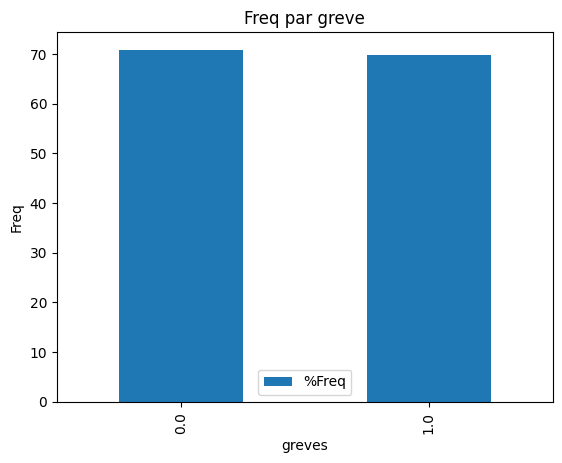

In [32]:
# Diagramme à barres représentant la fréquentation moyenne en fonction de la variable "greves".

df_final[["greves", "%Freq"]].groupby("greves").mean().plot(kind = "bar", title="Freq par greve",ylabel="Freq",)

In [33]:
#enlever les greves
masq_greve = df_final[df_final['greves'] == 1].index
df_final.drop(masq_greve, inplace = True)

<Axes: title={'center': 'Freq par fete_juive'}, xlabel='fete_juive', ylabel='Freq'>

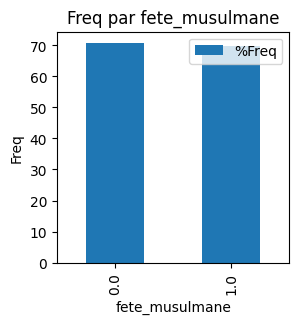

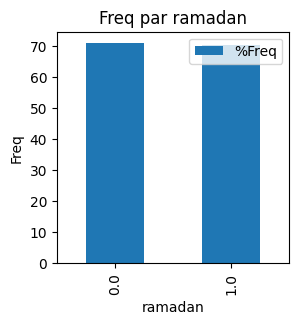

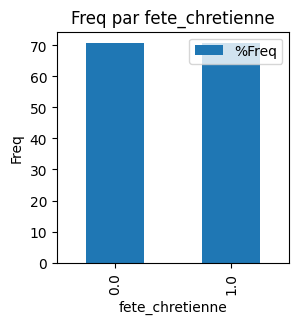

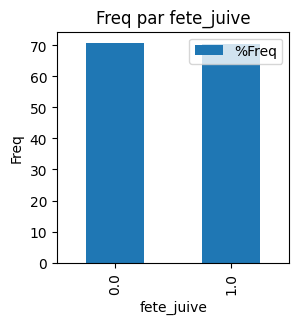

In [34]:
# Diagramme à barres représentant la fréquentation moyenne en fonction des variables des fêtes

df_final[["fete_musulmane", "%Freq"]].groupby("fete_musulmane").mean().plot(kind ="bar", title="Freq par fete_musulmane",ylabel="Freq",figsize=(3,3))

df_final[["ramadan", "%Freq"]].groupby("ramadan").mean().plot(kind ="bar", title="Freq par ramadan",ylabel="Freq",figsize=(3,3))

df_final[["fete_chretienne", "%Freq"]].groupby("fete_chretienne").mean().plot(kind = "bar", title="Freq par fete_chretienne",ylabel="Freq",figsize=(3,3))

df_final[["fete_juive", "%Freq"]].groupby("fete_juive").mean().plot(kind = "bar", title="Freq par fete_juive",ylabel="Freq",figsize=(3,3))

In [35]:
menu_r_only = df_final[df_final['_merge']=="right_only"].index

df_final.drop(menu_r_only,inplace=True)

In [36]:
df_final.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,fete_musulmane,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,other,_merge
0,2011-01-03,2010-2011,Lundi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,0,both
1,2011-01-04,2010-2011,Mardi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,0,both
2,2011-01-06,2010-2011,Jeudi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,0,both
3,2011-01-07,2010-2011,Vendredi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,0,both
4,2011-01-10,2010-2011,Lundi,2.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,0,both


In [37]:
df_final=df_final.drop(['other'], axis=1)

In [38]:
# Stats du dataframe df_final

df_final.describe(include="all")

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,fete_musulmane,...,%Freq,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
count,992,992,992,992.000000,992,992.0,992.0,992.000000,992.000000,992.000000,...,992.000000,992,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992
unique,992,10,4,NaN,10,NaN,NaN,NaN,NaN,NaN,...,NaN,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
freq,1,128,265,NaN,127,NaN,NaN,NaN,NaN,NaN,...,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992
mean,NaN,NaN,NaN,26.011089,NaN,0.0,0.0,0.009073,0.019153,0.022177,...,70.879995,NaN,0.137097,0.561492,0.262097,0.395161,0.007056,0.032258,0.003024,NaN
std,NaN,NaN,NaN,16.180954,NaN,0.0,0.0,0.094865,0.137133,0.147335,...,2.841300,NaN,0.344123,0.496455,0.439997,0.489132,0.083748,0.176774,0.054937,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,60.278474,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,11.750000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,69.116427,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,23.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,70.659048,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,41.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,72.546025,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN


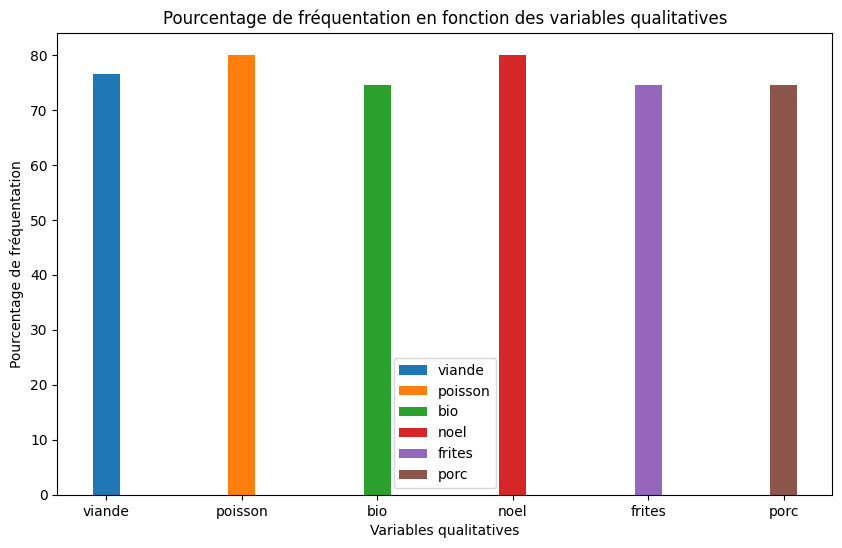

In [39]:

grouped_data = df_final.groupby(['viande', 'poisson', 'bio', 'noel', 'frites', 'porc'])['%Freq'].mean().reset_index(name='pourcentage_frequence')


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2


variables = ['viande', 'poisson', 'bio', 'noel', 'frites', 'porc']


x_pos = range(len(variables))


for i, variable in enumerate(variables):
    ax.bar(x_pos[i], grouped_data['pourcentage_frequence'][grouped_data[variable] == 1], bar_width, label=variable)


ax.set_xlabel('Variables qualitatives')
ax.set_ylabel('Pourcentage de fréquentation')
ax.set_title('Pourcentage de fréquentation en fonction des variables qualitatives')
ax.set_xticks(x_pos)
ax.set_xticklabels(variables)
ax.legend()


plt.show()

In [40]:
df_final.groupby("viande")["%Freq"].mean()

viande
0    72.466558
1    69.640937
Name: %Freq, dtype: float64

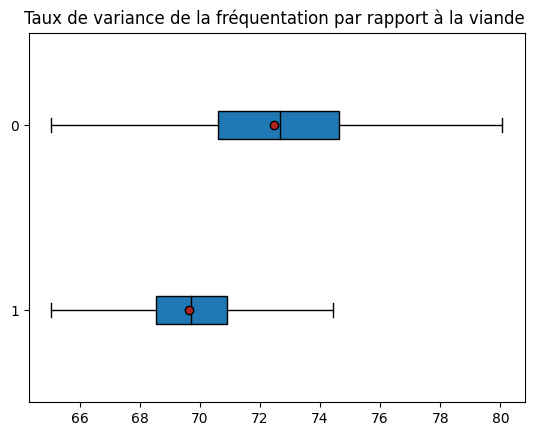

In [41]:
X = "viande"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport à la viande ")
plt.show()

In [42]:
df_final.groupby("poisson")["%Freq"].mean()

poisson
0    70.129098
1    72.994057
Name: %Freq, dtype: float64

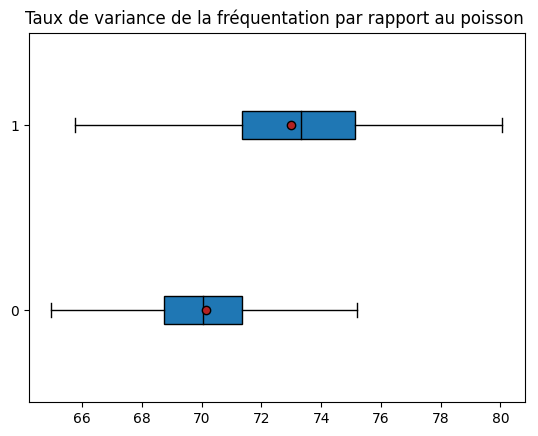

In [43]:
X = "poisson"

Y = "%Freq"

modalites = df_final["poisson"].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final["poisson"]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport au poisson ")

plt.show()

In [44]:
df_final.groupby("porc")["%Freq"].mean()

porc
0    71.078032
1    69.633525
Name: %Freq, dtype: float64

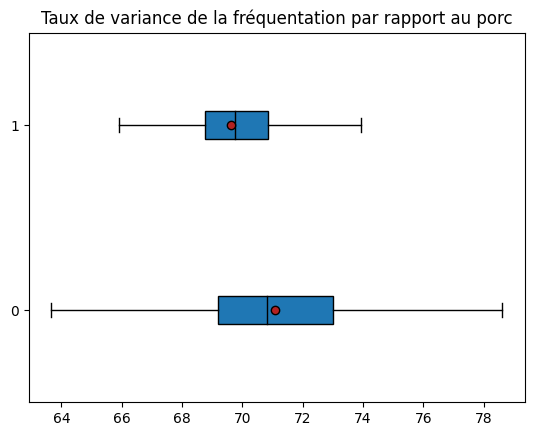

In [45]:
X = "porc"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport au porc")

plt.show()

In [46]:
df_final.groupby("bio")["%Freq"].mean()

bio
0    70.573666
1    71.348865
Name: %Freq, dtype: float64

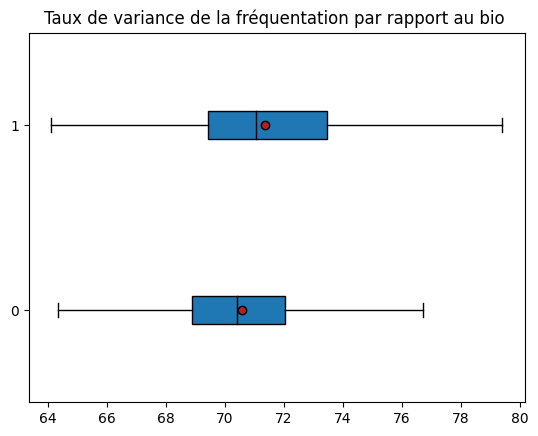

In [47]:
X = "bio"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport au bio ")

plt.show()

In [48]:
df_final.groupby("noel")["%Freq"].mean()

noel
0    70.836694
1    76.972999
Name: %Freq, dtype: float64

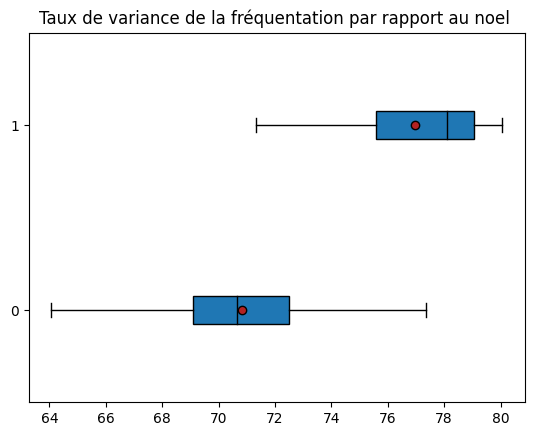

In [49]:
X = "noel"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport au noel ")

plt.show()

In [50]:
df_final.groupby("frites")["%Freq"].mean()

frites
0    70.865478
1    71.315482
Name: %Freq, dtype: float64

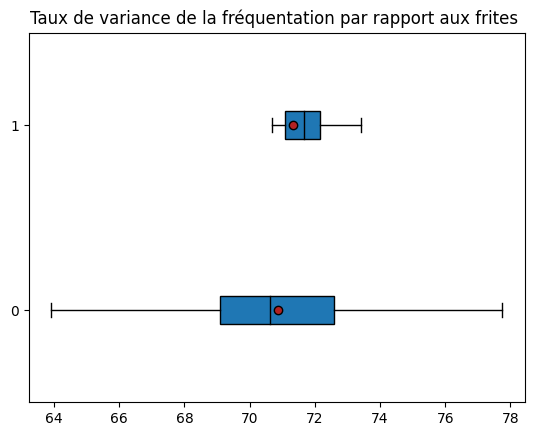

In [51]:
X = "frites"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport aux frites ")

plt.show()

In [52]:
df_final.groupby("an_chinois")["%Freq"].mean()

an_chinois
0    70.885201
1    69.163517
Name: %Freq, dtype: float64

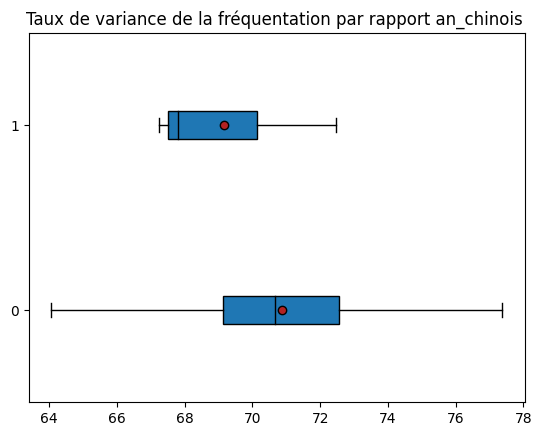

In [53]:
X = "an_chinois"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la fréquentation par rapport an_chinois ")

plt.show()

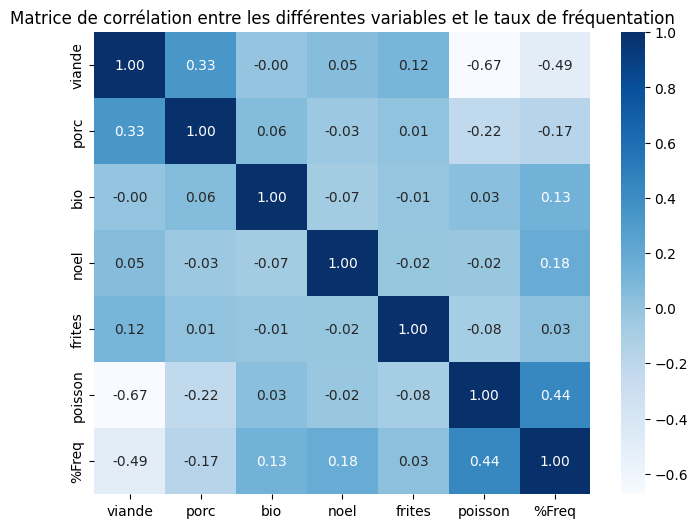

In [54]:
columns_of_interest = ["viande", "porc", "bio", "noel", "frites", "poisson", "%Freq"]

subset_data = df_final[columns_of_interest]

correlation_matrix = subset_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation entre les différentes variables et le taux de fréquentation")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [55]:
df_final.rename(columns={'%Freq': 'Percent_Freq'}, inplace=True)


### Corrélation grippe et fréquentation

In [56]:
df_gripe_freq = df_final[['inc_grippe','Percent_Freq']]


In [57]:
df_gripe_freq = df_gripe_freq.groupby('inc_grippe').agg({'Percent_Freq':'mean'}).reset_index()

In [58]:
df_gripe_freq

,inc_grippe,Percent_Freq
0,0.0,70.038721
1,10.0,70.209071
2,25.0,71.749012
3,44.0,70.997141
4,45.0,68.770317
...,...,...
212,18719.0,71.087298
213,21810.0,71.151526
214,22550.0,68.873161
215,34982.0,67.087962


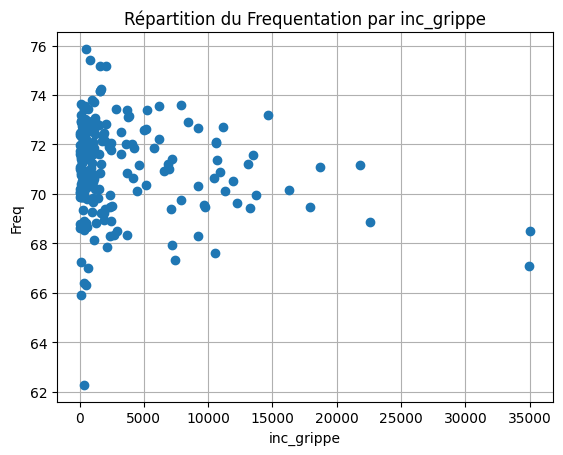

In [59]:
import matplotlib.pyplot as plt

plt.plot(df_gripe_freq["inc_grippe"],df_gripe_freq["Percent_Freq"],'o')
plt.xlabel("inc_grippe")
plt.ylabel("Freq")
plt.grid()
plt.title('Répartition du Frequentation par inc_grippe')
plt.show()

In [60]:
df_gripe_freq.corr()

,inc_grippe,Percent_Freq
inc_grippe,1.000000,-0.176013
Percent_Freq,-0.176013,1.000000


### Corrélation gastro et fréquentation

In [61]:
df_gastro_freq = df_final[['inc_gastro','Percent_Freq']]

In [62]:
df_gastro_freq = df_gastro_freq.groupby('inc_gastro').agg({'Percent_Freq':'mean'}).reset_index()

In [63]:
df_gastro_freq

,inc_gastro,Percent_Freq
0,0.0,68.911167
1,352.0,66.302825
2,402.0,72.120091
3,442.0,68.873160
4,519.0,68.461952
...,...,...
283,11162.0,71.556597
284,11259.0,69.949820
285,11335.0,69.455368
286,13388.0,72.128588


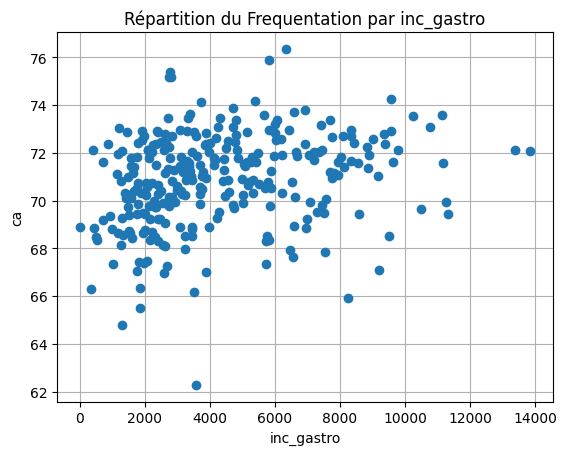

In [64]:
import matplotlib.pyplot as plt

plt.plot(df_gastro_freq["inc_gastro"],df_gastro_freq["Percent_Freq"],'o')
plt.xlabel("inc_gastro")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du Frequentation par inc_gastro')
plt.show()

In [65]:
df_gastro_freq.corr()

,inc_gastro,Percent_Freq
inc_gastro,1.000000,0.250179
Percent_Freq,0.250179,1.000000


In [66]:
variables = ['poisson','viande','porc','frites','an_chinois','noel','bio']


for var in variables:
    df_final[var] = df_final[var].astype('int')


In [67]:
# créer des variables indicatrices à partir de la colonne "mois" 

dummies = pd.get_dummies(df_final['mois'], dtype=int)
dummies

,Avril,Decembre,Fevrier,Janvier,Juin,Mai,Mars,Novembre,Octobre,Septembre
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,1,0,0
1084,0,0,0,0,0,0,0,1,0,0
1085,0,0,0,0,0,0,0,1,0,0
1086,0,0,0,0,0,0,0,1,0,0


In [68]:
# créer des variables indicatrices à partir de la colonne "jour" 

dummies_jour = pd.get_dummies(df_final['jour'], dtype=int)
dummies_jour

,Jeudi,Lundi,Mardi,Vendredi
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
1083,0,1,0,0
1084,0,0,1,0
1085,1,0,0,0
1086,0,0,0,1


In [69]:
df_final = pd.concat([df_final, dummies,dummies_jour], axis=1)


#  La Modélisation

##  Analyse de variance (ANOVA)

In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



model = ols('reel ~ poisson + viande + porc + frites + an_chinois + noel + bio + Janvier + Fevrier + Mars + Avril + Mai + Juin + Septembre + Octobre + Novembre +Decembre +Lundi+Mardi+Vendredi+Jeudi+ effectif', data=df_final).fit()


anova_table = sm.stats.anova_lm(model)


In [71]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
poisson,1.0,6.381528e+07,6.381528e+07,600.412054,1.295753e-103
viande,1.0,6.983536e+06,6.983536e+06,65.705247,1.567374e-15
porc,1.0,6.227778e+06,6.227778e+06,58.594634,4.666364e-14
frites,1.0,2.045670e+06,2.045670e+06,19.246878,1.274170e-05
an_chinois,1.0,3.304461e+06,3.304461e+06,31.090332,3.191834e-08
noel,1.0,1.005841e+07,1.005841e+07,94.635524,2.091453e-21
bio,1.0,7.601865e+07,7.601865e+07,715.228597,1.662838e-118
Janvier,1.0,2.806798e+06,2.806798e+06,26.408020,3.340855e-07
Fevrier,1.0,1.054777e+07,1.054777e+07,99.239703,2.524853e-22
Mars,1.0,1.697248e+06,1.697248e+06,15.968716,6.926991e-05


In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     427.0
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        18:13:42   Log-Likelihood:                -7137.6
No. Observations:                 992   AIC:                         1.432e+04
Df Residuals:                     971   BIC:                         1.442e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2129.3290    154.752    -13.760      0.000   -2433.016   -1825.642
poisson       99.0132     32.950      3.005      0.003      34.352     163.674
viande      -318.4197     34.344     -9.271      0.000    -385.817    -251.023
porc          40.1783     32.486      1.237      0.216     -23.573     103.929
frites       110.6268     59.865      1.848      0.065      -6.853     228.106
an_chinois   -80.7983    190.191     -0.425      0.671    -454.030     292.434
noel        1179.1402    130.569      9.031      0.000     922.911    1435.370
bio           10.1306     22.523      0.450      0.653     -34.069      54.330
Janvier     -173.9089     31.394     -5.540      0.000    -235.517    -112.300
Fevrier     -310.4814     36.950     -8.403      0.000    -382.992    -237.971
Mars        -186.0847     35.601     -5.227      0.000    -255.948    -116.221
Avril       -135.8159     38.463     -3.531      0.000    -211.297     -60.335
Mai          -81.4498     34.564     -2.356      0.019    -149.279     -13.620
Juin        -651.1862     32.808    -19.849      0.000    -715.568    -586.804
Septembre   -291.2007     33.679     -8.646      0.000    -357.294    -225.108
Octobre     -145.1919     37.602     -3.861      0.000    -218.982     -71.402
Novembre     -56.0553     34.688     -1.616      0.106    -124.128      12.018
Decembre     -97.9541     39.516     -2.479      0.013    -175.500     -20.408
Lundi       -892.7253     43.990    -20.294      0.000    -979.052    -806.399
Mardi       -472.4734     43.031    -10.980      0.000    -556.918    -388.028
Vendredi    -283.9996     45.387     -6.257      0.000    -373.067    -194.932
Jeudi       -480.1307     43.363    -11.072      0.000    -565.227    -395.035
effectif       0.8690      0.011     77.530      0.000       0.847       0.891
==============================================================================
Omnibus:                      248.917   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1533.951
Skew:                          -0.998   Prob(JB):                         0.00
Kurtosis:                       8.756   Cond. No.                     6.11e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Retirer les variables non significatives

In [73]:
# retirer les variables porc et an_chinois

model = ols('reel ~ poisson + viande + frites + noel +  bio + Janvier + Fevrier + Mars + Avril + Mai + Juin + Septembre + Octobre + Novembre + Decembre +Lundi+Mardi+Vendredi+Jeudi+ effectif', data=df_final).fit()


anova_table = sm.stats.anova_lm(model)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     474.4
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        18:13:43   Log-Likelihood:                -7138.5
No. Observations:                 992   AIC:                         1.432e+04
Df Residuals:                     973   BIC:                         1.441e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2108.3550    153.483    -13.737      0.000   -2409.551   -1807.158
poisson       98.8912     32.936      3.003      0.003      34.258     163.525
viande      -308.8282     33.344     -9.262      0.000    -374.262    -243.394
frites       108.2084     59.812      1.809      0.071      -9.168     225.585
noel        1171.5840    130.394      8.985      0.000     915.699    1427.469
bio           12.9069     22.422      0.576      0.565     -31.094      56.907
Janvier     -173.6728     31.237     -5.560      0.000    -234.972    -112.374
Fevrier     -307.8909     36.753     -8.377      0.000    -380.015    -235.767
Mars        -183.5364     35.537     -5.165      0.000    -253.273    -113.799
Avril       -133.5502     38.417     -3.476      0.001    -208.941     -58.160
Mai          -80.3290     34.548     -2.325      0.020    -148.126     -12.532
Juin        -648.6824     32.742    -19.812      0.000    -712.935    -584.430
Septembre   -290.3986     33.669     -8.625      0.000    -356.471    -224.327
Octobre     -140.7736     37.422     -3.762      0.000    -214.211     -67.337
Novembre     -54.0186     34.643     -1.559      0.119    -122.002      13.965
Decembre     -95.5026     39.460     -2.420      0.016    -172.939     -18.066
Lundi       -888.3635     43.781    -20.291      0.000    -974.279    -802.448
Mardi       -466.0603     42.676    -10.921      0.000    -549.807    -382.313
Vendredi    -278.9961     45.100     -6.186      0.000    -367.501    -190.491
Jeudi       -474.9350     43.072    -11.027      0.000    -559.460    -390.410
effectif       0.8674      0.011     78.050      0.000       0.846       0.889
==============================================================================
Omnibus:                      247.534   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.860
Skew:                          -0.996   Prob(JB):                         0.00
Kurtosis:                       8.698   Cond. No.                     5.46e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Modèle de régression linéaire

In [75]:
from sklearn.model_selection import train_test_split

X= df_final[['poisson', 'viande', 'frites', 'noel','bio', 'Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Septembre', 'Octobre', 'Decembre', 'Lundi', 'Mardi', 'Vendredi', 'Jeudi', 'effectif']]
y = df_final[['reel']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [77]:
y_test.shape

(298, 1)

In [78]:
y_train.shape

(694, 1)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_test_pred = model.predict(X_test)

In [83]:
r2 =r2_score(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

In [84]:
# R2 score pendant le test

r2

0.888525962458392

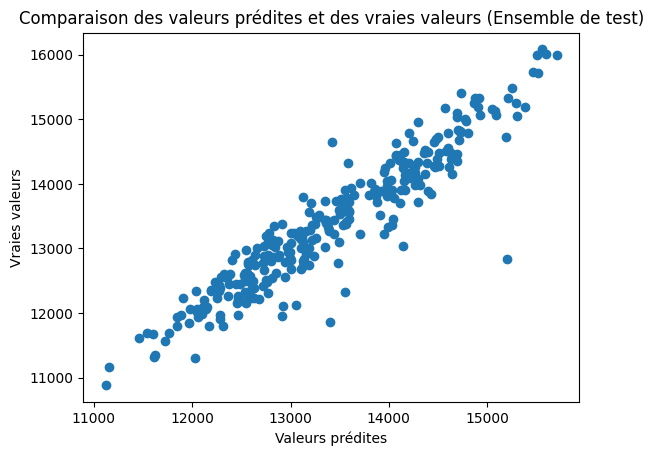

In [85]:
plt.scatter(y_test_pred, y_test)
plt.xlabel("Valeurs prédites")
plt.ylabel("Vraies valeurs")
plt.title("Comparaison des valeurs prédites et des vraies valeurs (Ensemble de test)")
plt.show()

In [86]:
y_train_pred = model.predict(X_train)



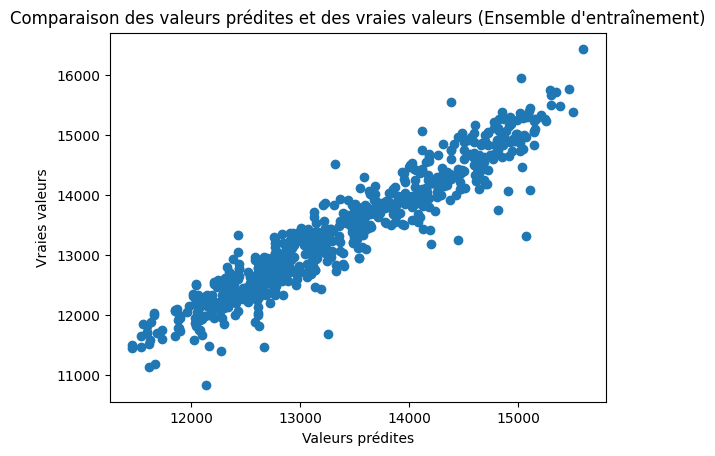

In [87]:
plt.scatter(y_train_pred, y_train)
plt.xlabel("Valeurs prédites")
plt.ylabel("Vraies valeurs")
plt.title("Comparaison des valeurs prédites et des vraies valeurs (Ensemble d'entraînement)")
plt.show()

In [88]:
r2 =r2_score(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [89]:
# R2 score pendant l'entraînement

r2

0.9010237473624512